# King County House Sales Data Analysis Project

For this preoject, regression modeling will be used on the King County House sales dataset in order to analyze house sales in a Northwestern county of Washington. The file kc_house_data.csv contained the data utilized in this project. The data will help inform the models and features highlighted to address the stakeholder's needs.

# Business Understanding

## Stakeholders
* The stakeholders in this project is Ramtuck Realty Group

## Consumer Use
* Ramtuck Realty group will use the results obtained from this project to help their clients who have made specific requests about the home they are looking for within King County.

# Data Understanding

We will be focusing on price as our target variable since it is dependent on various features present on our dataset. Presented below is the outline and description of the columns present in our dataset.

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


For our purposes we will be disregarging the following columns in the data
* **date**
* **id**


First, we will import the libraries that we will require in order to analyze our data. We will also import our dataset as 'data'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('kc_house_data.csv')

We look at the descriptive information of our dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Determine the number of rows and columns in the dataset.

In [5]:
data.shape

(21597, 21)

Initial analysis of the correlation between variables in the dataset

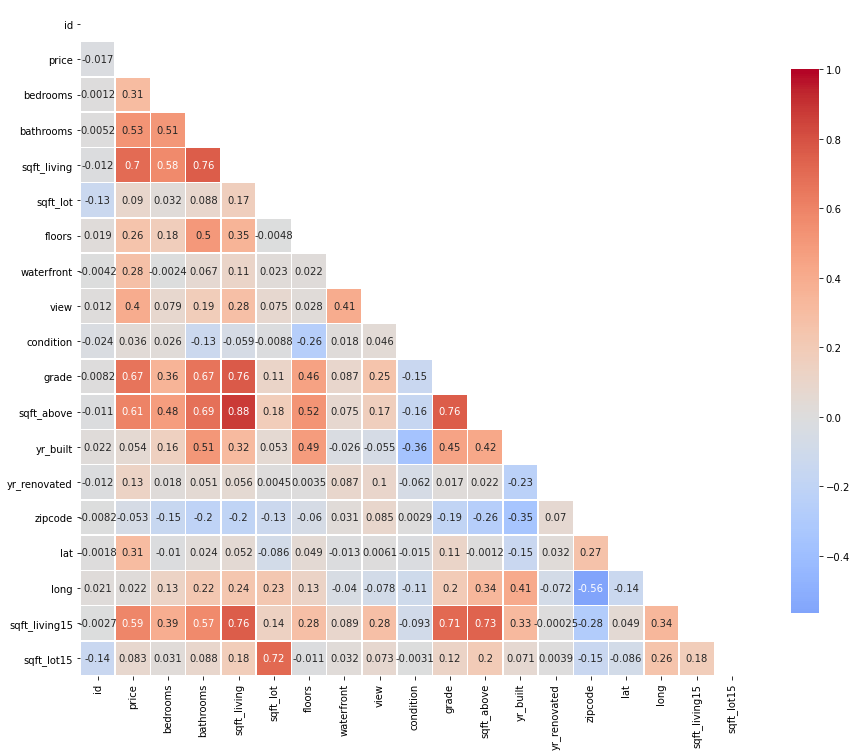

In [6]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

From the inital correlation analysis we can interpret:
* Darker red boxes outline our variables that have strong positive linear relationships
* Darker blue boxes outline our variables that have strong negative linear relationships

We will focus on the variables that focus on condition and size since they share some positive relationships with price. We will also work on creating observations regarding square footage

# Data Preparation

Drop the columns that are not required from the dataset

In [7]:
data = data.drop(columns= ['id','date'])

In [8]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


There are a couple of NaN and 0 values that I will work on cleaning up

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [10]:
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In order to clean up some of the NaN that are present the following will be completed:
* Set NaNs in 'waterfront' to 0, meaning there is no waterfront present 
* Set NaNs in 'views' to 0, meaning that the property has not been viewed
* Set 0.0 in 'yr_renovated' to null, meaning that the property has not been renovated
* Set 0.0 and ? in 'sqft_basement' to null, meaning that the property does not have a basement


In [11]:
data['waterfront'] = data['waterfront'].fillna(0)
data['view'] = data['view'].fillna(0)
data['yr_renovated'] = data['yr_renovated'].replace(0,np.nan)
data['sqft_basement'] = data['sqft_basement'].replace('0.0',np.nan)
data['sqft_basement'] = data['sqft_basement'].replace('?',np.nan)

There are two additional items that need to be done with the data:
* Set the 'zipcode' column to a string for ease of use
* Set the 'sqft_basement' data type to float

In [12]:
data.zipcode = data.zipcode.astype(str)
data['sqft_basement'] = data['sqft_basement'].astype(float)

At this point, we can review the dataset to see the changes that have been made.

In [13]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,NaN,1955,NaN,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,NaN,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,NaN,1987,NaN,98074,47.6168,-122.045,1800,7503


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  8317 non-null   float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   744 non-null    float64
 14  zipcode        21597 non-null  object 
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

Get some descriptive statistics for each of the column.

In [15]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,8317.000000,21597.000000,744.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,741.928700,1970.999676,1995.928763,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,404.765113,29.375234,15.599946,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,10.000000,1900.000000,1934.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,450.000000,1951.000000,1987.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,700.000000,1975.000000,2000.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,980.000000,1997.000000,2007.250000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


# Modeling

## Initial Visualizations for Modeling 
We will evaluate our dataset in order to inform our feature engineering. In order to complete this task we will use the following methods:
* Histogram of our x variables
* Simple Linear Regression graphs of the most promising x variables vs 'Price', our target variable.
* R squared values in order to test how close the data is to the fitted regression line

### Histogram

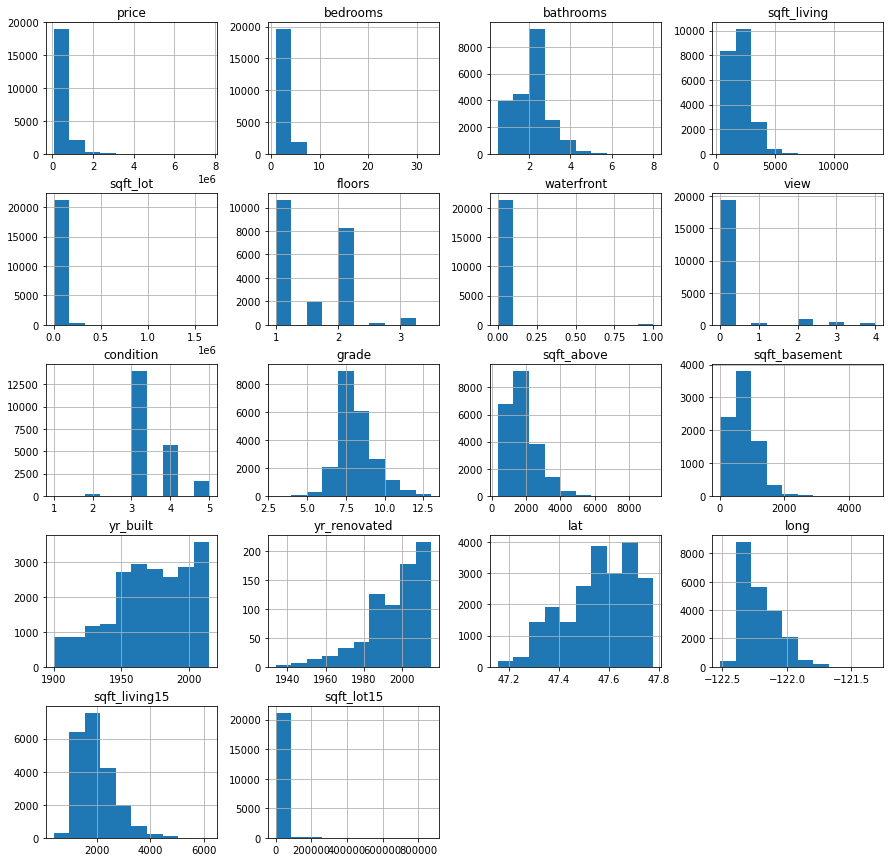

In [16]:
data.hist(figsize=([15,15]));

### Linear Regression with Promising X variables
We will be creating visualizations for the following x variables:
* **sqft_living**
* **grade**
* **sqft_above**
* **sqft_living15**
* **bathrooms**
* **bedrooms**
* **view**
* **lat**



#### Sqft_Living vs Price

R squared: 0.49268789904035093


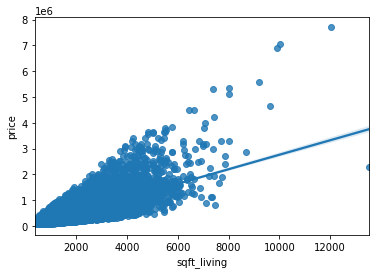

In [17]:
y = data['price']
sqft_living_x = data['sqft_living']
model = ols(formula = 'y~sqft_living_x', data=data).fit()
print('R squared:', model.rsquared)

sns.regplot(x='sqft_living', y='price', data=data);

#### Grade vs Price

R squared: 0.44615823299735025


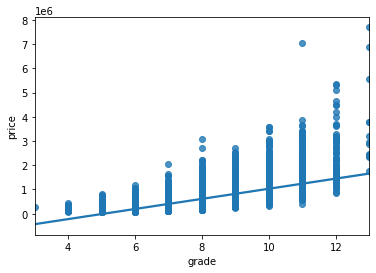

In [18]:
grade_x = data['grade']
model = ols(formula = 'y~grade_x', data=data).fit()
print('R squared:', model.rsquared)

sns.regplot(x='grade', y='price', data=data);

#### Sqft_above vs Price

R squared: 0.36647034726583827


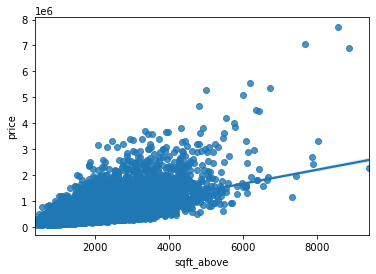

In [19]:
sqft_above_x = data['sqft_above']
model = ols(formula = 'y~sqft_above_x', data=data).fit()
print('R squared:', model.rsquared)
sns.regplot(x='sqft_above', y='price', data=data);

#### Sqft_living15 vs Price

R squared: 0.34250726417201915


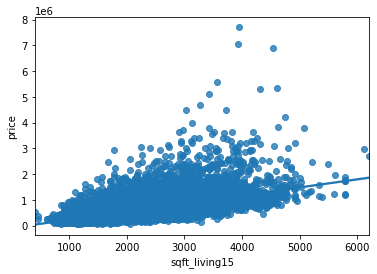

In [20]:
sqft_living15_x = data['sqft_living15']
model = ols(formula = 'y~sqft_living15_x', data=data).fit()
print('R squared:', model.rsquared)

sns.regplot(x='sqft_living15', y='price', data=data);

#### Bathrooms vs Price

R squared: 0.27657672267607736


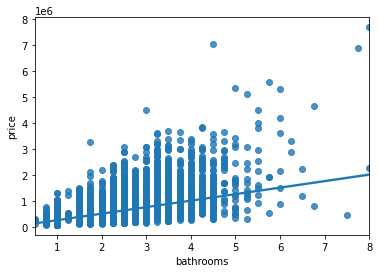

In [21]:
bathrooms_x = data['bathrooms']
model = ols(formula = 'y~bathrooms_x', data=data).fit()
print('R squared:', model.rsquared)

sns.regplot(x='bathrooms', y='price', data=data);

#### Bedrooms vs Price

R squared: 0.0953497028373066


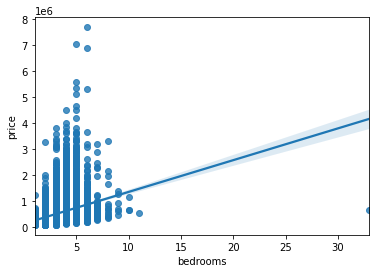

In [22]:
bedrooms_x = data['bedrooms']
model = ols(formula = 'y~bedrooms_x', data=data).fit()
print('R squared:', model.rsquared)

sns.regplot(x='bedrooms', y='price', data=data);

#### View vs Price

R squared: 0.15483962881266589


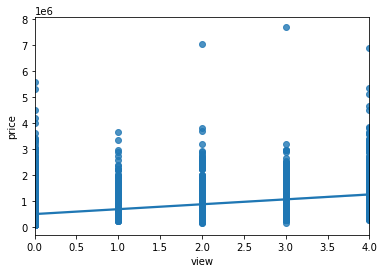

In [23]:
view_x = data['view']
model = ols(formula = 'y~view_x', data=data).fit()
print('R squared:', model.rsquared)

sns.regplot(x='view', y='price', data=data);

#### Lat vs Price

R squared: 0.09406017561857016


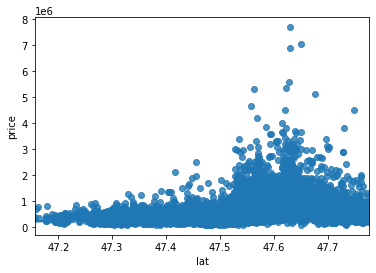

In [24]:
lat_x = data['lat']
model = ols(formula = 'y~lat_x', data=data).fit()
print('R squared:', model.rsquared)

sns.regplot(x='lat', y='price', data=data);

## Functions for Multiple Linear Regressions and Error

Stats_reg summary does the following:
* outputs regression summary through statsmodels for a DataFrame
* sets predictors as a numpy array of X
* adds a constant to predictors
* passes DV and predictors through OLS
* provides OLS summary

In [25]:
def stats_linreg_summary(df):
    X = df.drop(['log_price', 'price'], axis=1)
    y = df.log_price
    predictors = np.asarray(X)
    predictors_int = sm.add_constant(predictors)
    model = sm.OLS(y, predictors_int).fit()
    print('List of Predictors:', X.columns)
    print(model.summary())

Sk_linreg_summary does the following:
* outputs R squared and error metrics through sklearn for a DataFrame
* creates test-train-split
* provides the list of predictors
* Calculates our R squared value
* Provides necessary Mean Absolute Error and Mean Squared Error Value
* Calculates the RMSE from the obtained MSE

In [26]:
def sk_linreg_summary(df):
    X = df.drop(['log_price', 'price'], axis=1)
    y = df.log_price
    ss = StandardScaler()
    X_scaled = ss.fit_transform(X)
    np.random.seed(33)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    coeff_array = linreg.coef_
    r_2 = metrics.r2_score(y_test, linreg.predict(X_test))
    mae = metrics.mean_absolute_error(np.exp(y_test), np.exp(linreg.predict(X_test)))
    mse = metrics.mean_squared_error(np.exp(y_test), np.exp(linreg.predict(X_test)))
    
    print('Results of Sklearn Train Test Split:')
    print('Array of coefficients:', [coeff_array])
    print('List of Predictors:', X.columns)
    print('R squared:', r_2)
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', np.sqrt(mse))

kfolds does the following:
* Forces the data as a pandas dataframes
* Creates a list for our folds
* Makes fold size 1 unit larger to account for leftovers

In [27]:
def kfolds(data, k):
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            fold = data.iloc[start_obs: start_obs + fold_size + 1]
            folds.append(fold)
            start_obs += fold_size + 1
        else:
            fold = data.iloc[start_obs: start_obs + fold_size]
            folds.append(fold)
            start_obs += fold_size
    return folds

            

kfolds_error_summary does the following:
* Applies kfolds function to a given dataframe
* Outputs R squares and error metrics
* Splits train and test values for folds
* Fits our linear regression model
* Evaluates our train and test errors
* Provides our MSE, MAE and RMSE values

In [28]:
def kfolds_error_summary(df,k):
    X = df.drop(['log_price', 'price'], axis=1)
    y = df[['log_price']]
    k_folds_df = kfolds(df, k)
    MSE_test_err = []
    MSE_train_err = []
    MAE_test_err = []
    MAE_train_err = []
    k=k
    linreg = LinearRegression()
    cv_kresults = cross_val_score(linreg, X, y, cv=k, scoring='r2')
    for n in range(k):
        train = pd.concat([fold for i, fold in enumerate(k_folds_df) if i !=n])
        test = k_folds_df[n]
        linreg.fit(train[X.columns], train[y.columns])
        y_hat_train = linreg.predict(train[X.columns])
        y_hat_test = linreg.predict(test[X.columns])
        test_residuals = np.exp(y_hat_test) - np.exp(test[y.columns])
        train_residuals = np.exp(y_hat_train) - np.exp(train[y.columns])
        MSE_test_err.append(np.mean(test_residuals.astype(float)**2))
        MSE_train_err.append(np.mean(train_residuals.astype(float)**2))
        MAE_test_err.append(np.mean(abs(test_residuals.astype(float))))
        MAE_train_err.append(np.mean(abs(train_residuals.astype(float))))
        
    print('List of Predictors:', X.columns)
    print('R squared when k={k}:', np.mean(cv_kresults))
    print('Average training Mean Absolute Error when k={k}:', np.mean(MAE_train_err))
    print('Average training Mean Square Error when k={k}:', np.mean(MSE_train_err))
    print('Average Root Mean Square Error when k={k}:', np.sqrt(np.mean(MSE_train_err)))  

## Initial Model: Multiple Linear Regression with 6 Features

From the initial evaluation we did with 8 features above, we have limited the features that we will be using for our model to 6. This is so that we can highlihght those features that appear to have the strongest relationship with our target variable 'price'.

The features that we will be including in 'data_t6' which represents our top 6 features are:
* bathrooms
* sqft_living
* grade
* sqft_above
* view
* sqft_living15

We will then be using our functions in order to determine model efficacy through its metrics.

Additionally we will be log transforming our target variable as well, since it is not normally distributed. This also helps us stay within the linear regression assumptions of normality. A visualization of the difference will be presented.

In [29]:
data_t6 = data[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view']]

In [30]:
data_t6['log_price'] = np.log(data_t6['price'])

#### Histogram for comparison of original price vs log_price

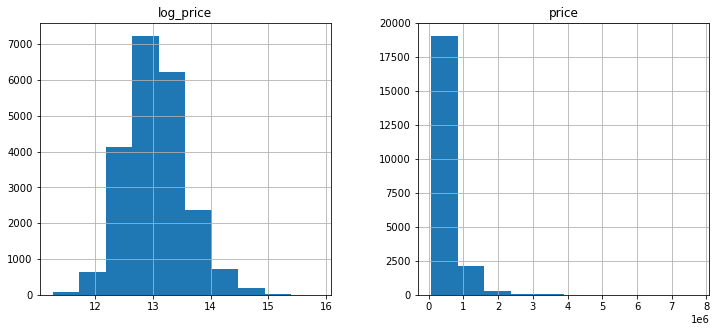

In [31]:
data_t6[['log_price', 'price']].hist(figsize=(12,5));

#### Statsmodel Results

In [32]:
stats_linreg_summary(data_t6)

List of Predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     5034.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:09:28   Log-Likelihood:                -7343.4
No. Observations:               21597   AIC:                         1.470e+04
Df Residuals:                   21590   BIC:                         1.476e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975

#### Sklearn Results

In [33]:
sk_linreg_summary(data_t6)

Results of Sklearn Train Test Split:
Array of coefficients: [array([ 0.22286925,  0.21561096, -0.08675588,  0.05233619, -0.00474355,
        0.06411343])]
List of Predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view'],
      dtype='object')
R squared: 0.5941566537740015
Mean Absolute Error: 145721.69281836363
Mean Squared Error: 49489790470.363
Root Mean Squared Error: 222463.00921807878


#### Kfolds Results

In [34]:
kfolds_error_summary(data_t6,5)

List of Predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view'],
      dtype='object')
R squared when k={k}: 0.5807327492042109
Average training Mean Absolute Error when k={k}: 146071.1318599914
Average training Mean Square Error when k={k}: 56550273327.68461
Average Root Mean Square Error when k={k}: 237803.0137060601


### First Multiple Linear Regression Results Analysis

#### R squared
* Statsmodels: 0.58
* Sklearn:     0.59
* Kfold:       0.57

#### Mean Absolute Error
* Sklearn: 145,721
* Kfolds: 145,885

#### Root Square Means Error
* Sklearn: 222,463
* Kfolds: 243,433

##### Observations
* Compared to the R squared values we have seen such as 0.49 for sqft_living variable, we have been able to obtain a small but at the same time relatively significant increase to 0.58. It appears that including the 6 top variables in a MLR that we were able to improve on our metrics, although our MSE and MAE still need work. These values will give us a baseline to work of off as we continue to improve the model and take into account factors such as multicollinearity which can affect our results. We will work to improve the results of our current MLR model.

# Multiple Regression Model Tests for Improvement

Since we have been able to deduce that sqft_living is our highest predictor from previous analysis, we will work on manipulating 'data_t6' variables in order to see if this results in improvement in our model. We will take into consideration variables that are highly correlated with sqft_living within 'data_t6. We will also consider, if necessary, adding variables from our original dataset 'data' in order to see if there are additional improvements that can be made beyond the variables in 'data_t6'.

## First Test: Removing 'sqft_above'
* Since 'sqft_above' and 'sqft_living' are highly correlated (0.88), it is important to see if this relationship may be a source of collinearity leading to obfuscation of our model.


In [35]:
data2 = data_t6.drop(['sqft_above'], axis=1)
data2.head()

,price,sqft_living,grade,sqft_living15,bathrooms,view,log_price
0,221900.0,1180,7,1340,1.00,0.0,12.309982
1,538000.0,2570,7,1690,2.25,0.0,13.195614
2,180000.0,770,6,2720,1.00,0.0,12.100712
3,604000.0,1960,7,1360,3.00,0.0,13.311329
4,510000.0,1680,8,1800,2.00,0.0,13.142166


We will rerun the functions we previously used for 'data_t6'

In [36]:
stats_linreg_summary(data2)

List of Predictors: Index(['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     5895.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:09:28   Log-Likelihood:                -7496.6
No. Observations:               21597   AIC:                         1.501e+04
Df Residuals:                   21591   BIC:                         1.505e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [37]:
sk_linreg_summary(data2)

Results of Sklearn Train Test Split:
Array of coefficients: [array([ 0.16479521,  0.20013731,  0.04226941, -0.0061546 ,  0.07299624])]
List of Predictors: Index(['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view'], dtype='object')
R squared: 0.5868925696731291
Mean Absolute Error: 147108.20373288167
Mean Squared Error: 49398906678.23131
Root Mean Squared Error: 222258.6481517228


In [38]:
kfolds_error_summary(data2,5)

List of Predictors: Index(['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view'], dtype='object')
R squared when k={k}: 0.5747232810060643
Average training Mean Absolute Error when k={k}: 147381.3432385779
Average training Mean Square Error when k={k}: 56366428450.22713
Average Root Mean Square Error when k={k}: 237416.1503567673


### First Test: Removing 'sqft_above' Analysis
The results from our first test are as follows:

#### R squared
* Statsmodels: 0.57
* Sklearn: 0.58
* Kfolds: 0.57

#### Mean Absolute Error
* Sklearn: 147,108
* Kfolds: 147,381

#### Root Mean Square Error
* Sklearn: 222,258
* Kfolds: 237,416

##### Observations
From this test we were able to determine that removing 'sqft_above' does not improve our values overall. While there was improvement for our RMSE, R Squared and MAE increased. Therefore, it would be advisable to keep 'sqft_above' in our dataset.

## Second Test: Removing 'grade'
* Since 'grade' and 'sqft_living' are highly correlated (0.76), it is important to see if this relationship may be a source of collinearity leading to obfuscation of our model.

In [39]:
data3 = data_t6.drop(['grade'], axis=1)
data3.head()

,price,sqft_living,sqft_above,sqft_living15,bathrooms,view,log_price
0,221900.0,1180,1180,1340,1.00,0.0,12.309982
1,538000.0,2570,2170,1690,2.25,0.0,13.195614
2,180000.0,770,770,2720,1.00,0.0,12.100712
3,604000.0,1960,1050,1360,3.00,0.0,13.311329
4,510000.0,1680,1680,1800,2.00,0.0,13.142166


We will rerun the functions we previously used for 'data_t6' and 'data2'

#### Statsmodels Results

In [40]:
stats_linreg_summary(data3)

List of Predictors: Index(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'view'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     4796.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:09:28   Log-Likelihood:                -8725.1
No. Observations:               21597   AIC:                         1.746e+04
Df Residuals:                   21591   BIC:                         1.751e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

#### Sklearn Results

In [41]:
sk_linreg_summary(data3)

Results of Sklearn Train Test Split:
Array of coefficients: [array([ 0.2529943 , -0.0228562 ,  0.10897113,  0.03800081,  0.07501292])]
List of Predictors: Index(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'view'], dtype='object')
R squared: 0.5360006723292332
Mean Absolute Error: 158673.8370112104
Mean Squared Error: 65446506240.57118
Root Mean Squared Error: 255825.1477876465


#### Kfolds Results

In [42]:
kfolds_error_summary(data3,5)

List of Predictors: Index(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'view'], dtype='object')
R squared when k={k}: 0.5215339143442559
Average training Mean Absolute Error when k={k}: 158253.99286723376
Average training Mean Square Error when k={k}: 90103892521.7644
Average Root Mean Square Error when k={k}: 300173.10426113196


### Second Test: Removing 'grade' Analysis
The results from our first test are as follows:

#### R squared
* Statsmodels: 0.52
* Sklearn: 0.52
* Kfolds: 0.50

#### Mean Absolute Error
* Sklearn: 162,973
* Kfolds: 162,371

#### Root Mean Square Error
* Sklearn: 341,561
* Kfolds: 404,754

##### Observations
From this test we were able to determine that removing 'grade' does not improve our values overall. There was an increase for RMSE, R Squared decreased and MAE increased. Therefore, it would be advisable to keep 'grade' in our dataset.

## Third Test: Adding 'yr_built' and 'yr_renovated' as a new feature
* For this test we will attempt to add a new variable to our dataset by engineering a feature that helps consolidate the data from two sources, 'yr_built' and 'yr_renovated' to get the maximum (read most recent date) of construction/remodeling of a property to see if this improves our values. 

In [43]:
data['yr_new_construction'] = data[['yr_built', 'yr_renovated']].max(axis=1)
data['log_price'] = np.log(data['price']) #log had to be redone since we are accessing original cleaned data

In [44]:
data4 = data[['price','log_price','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'yr_new_construction']]

In [45]:
data4.head()

,price,log_price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,yr_new_construction
0,221900.0,12.309982,1180,7,1180,1340,1.00,0.0,1955.0
1,538000.0,13.195614,2570,7,2170,1690,2.25,0.0,1991.0
2,180000.0,12.100712,770,6,770,2720,1.00,0.0,1933.0
3,604000.0,13.311329,1960,7,1050,1360,3.00,0.0,1965.0
4,510000.0,13.142166,1680,8,1680,1800,2.00,0.0,1987.0


#### Statsmodel Results

In [46]:
stats_linreg_summary(data4)

List of Predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'yr_new_construction'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     5168.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:09:28   Log-Likelihood:                -6164.5
No. Observations:               21597   AIC:                         1.234e+04
Df Residuals:                   21589   BIC:                         1.241e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|

#### Sklearn Results

In [47]:
sk_linreg_summary(data4)

Results of Sklearn Train Test Split:
Array of coefficients: [array([ 0.13505761,  0.2542307 , -0.0333684 ,  0.05678141,  0.074552  ,
        0.05084877, -0.14097672])]
List of Predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'yr_new_construction'],
      dtype='object')
R squared: 0.635435847695165
Mean Absolute Error: 137985.7172432393
Mean Squared Error: 48168746677.32594
Root Mean Squared Error: 219473.79496724874


#### Kfolds Results

In [48]:
kfolds_error_summary(data4,5)

List of Predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'yr_new_construction'],
      dtype='object')
R squared when k={k}: 0.620760384975466
Average training Mean Absolute Error when k={k}: 137856.05535186446
Average training Mean Square Error when k={k}: 52896497306.666725
Average Root Mean Square Error when k={k}: 229992.38532322482


### Third Test: Adding 'yr_built' and 'yr_renovated' as a new feature
The results from our first test are as follows:

#### R squared
* Statsmodels: 0.62
* Sklearn: 0.63
* Kfolds: 0.62

#### Mean Absolute Error
* Sklearn: 137,985
* Kfolds: 137,856

#### Root Mean Square Error
* Sklearn: 219,473
* Kfolds: 229,992

##### Observations
From this test we were able to determine that adding the new feature 'yr_new_construction improved our values overall. There was an decrease for RMSE, R Squared increased and MAE decreased. Therefore, it would be advisable to keep 'yr_new_construction' in our dataset.

## Assessment of 'Data4' for Transformation
* We will look at the current state of our variable distributions to see if we can improve our models and meet the assumptions necessary for linear regression.

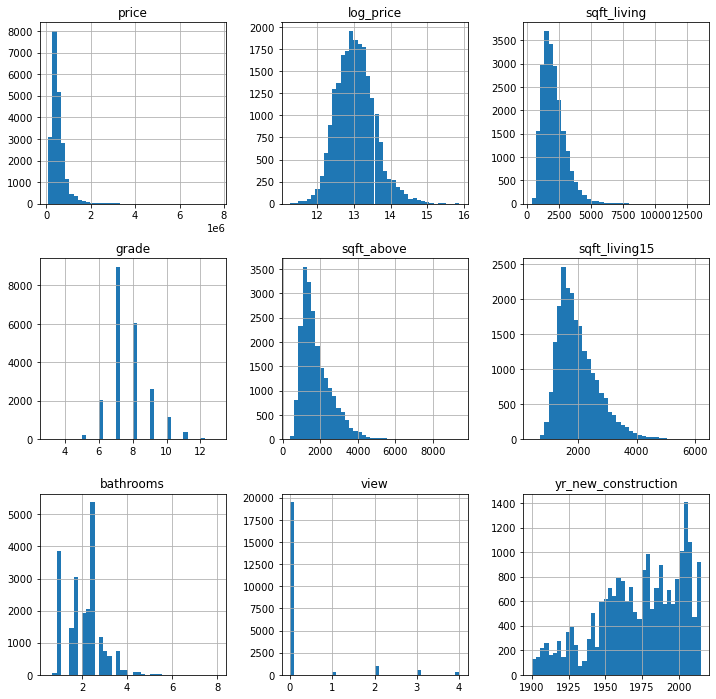

In [49]:
data4.hist(figsize=(12,12), bins=40);

From the histogram we see that we can transform two variables in hopes of improving normality. Included will also be histograms before and after transformation so we can visualize the change.

###  Transformation of 'sqft_living'

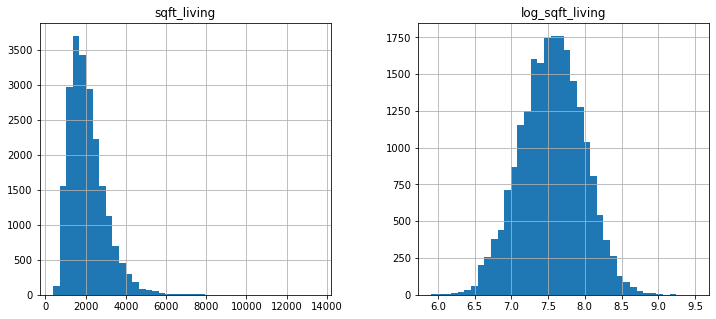

In [50]:
data4['log_sqft_living'] = np.log(data4['sqft_living'])
data4[['sqft_living', 'log_sqft_living']].hist(figsize=(12,5), bins=40);

### Transformation of 'sqft_living15'

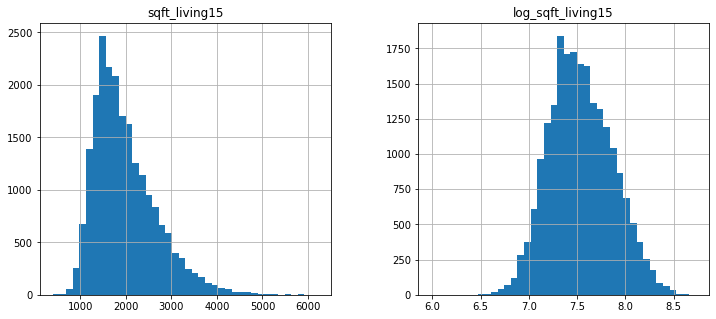

In [51]:
data4['log_sqft_living15'] = np.log(data4['sqft_living15'])
data4[['sqft_living15', 'log_sqft_living15']].hist(figsize=(12,5), bins=40);

### Transformation of 'sqft_above'

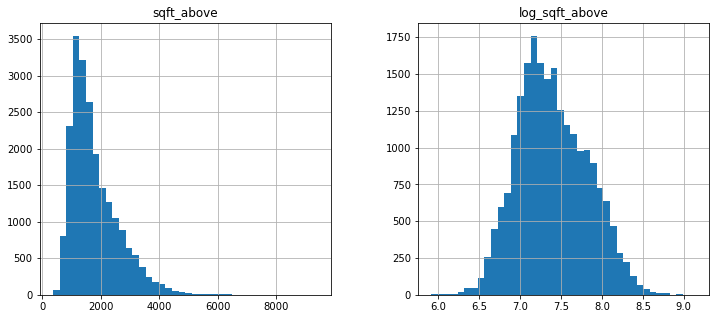

In [52]:
data4['log_sqft_above'] = np.log(data4['sqft_above'])
data4[['sqft_above', 'log_sqft_above']].hist(figsize=(12,5), bins=40);

#### Re-visualization

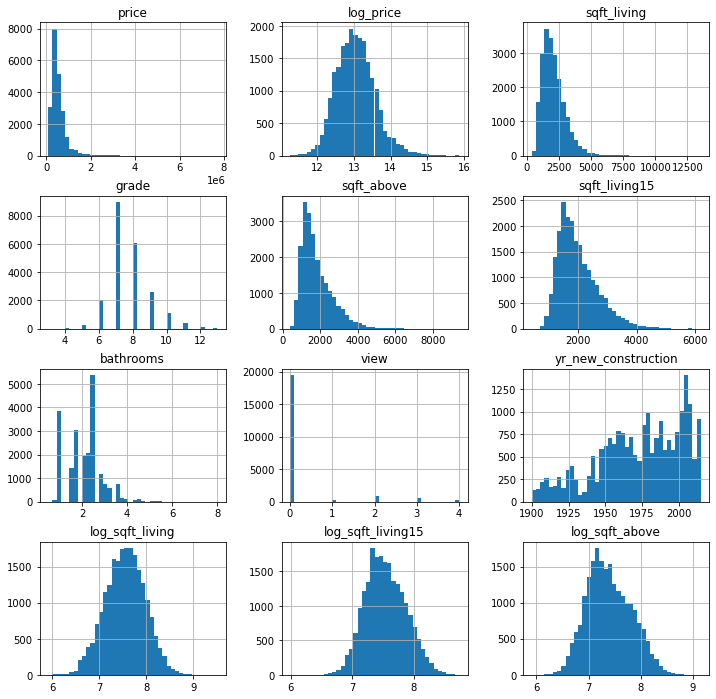

In [53]:
data4.hist(figsize=(12,12), bins=40);

We will need to drop the old columns in the dataset for the variables that we have transformed.

In [54]:
data4.head()

,price,log_price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,yr_new_construction,log_sqft_living,log_sqft_living15,log_sqft_above
0,221900.0,12.309982,1180,7,1180,1340,1.00,0.0,1955.0,7.073270,7.200425,7.073270
1,538000.0,13.195614,2570,7,2170,1690,2.25,0.0,1991.0,7.851661,7.432484,7.682482
2,180000.0,12.100712,770,6,770,2720,1.00,0.0,1933.0,6.646391,7.908387,6.646391
3,604000.0,13.311329,1960,7,1050,1360,3.00,0.0,1965.0,7.580700,7.215240,6.956545
4,510000.0,13.142166,1680,8,1680,1800,2.00,0.0,1987.0,7.426549,7.495542,7.426549


In [55]:
data5 = data4.drop(columns=['sqft_living', 'sqft_living15', 'sqft_above'])

In [56]:
data5.head()

,price,log_price,grade,bathrooms,view,yr_new_construction,log_sqft_living,log_sqft_living15,log_sqft_above
0,221900.0,12.309982,7,1.00,0.0,1955.0,7.073270,7.200425,7.073270
1,538000.0,13.195614,7,2.25,0.0,1991.0,7.851661,7.432484,7.682482
2,180000.0,12.100712,6,1.00,0.0,1933.0,6.646391,7.908387,6.646391
3,604000.0,13.311329,7,3.00,0.0,1965.0,7.580700,7.215240,6.956545
4,510000.0,13.142166,8,2.00,0.0,1987.0,7.426549,7.495542,7.426549


## Fourth Test: Implementing our Log Transformations
* Now that our three variables above have been transformed to be closer to nromality we will implement them to see if they improve our metrics

#### Statsmodel Results

In [57]:
stats_linreg_summary(data5)

List of Predictors: Index(['grade', 'bathrooms', 'view', 'yr_new_construction', 'log_sqft_living',
       'log_sqft_living15', 'log_sqft_above'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     5194.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:09:31   Log-Likelihood:                -6130.8
No. Observations:               21597   AIC:                         1.228e+04
Df Residuals:                   21589   BIC:                         1.234e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

#### Sklearn Results

In [58]:
sk_linreg_summary(data5)

Results of Sklearn Train Test Split:
Array of coefficients: [array([ 0.26245038,  0.07295565,  0.05559668, -0.14695202,  0.12661806,
        0.05648824, -0.02748581])]
List of Predictors: Index(['grade', 'bathrooms', 'view', 'yr_new_construction', 'log_sqft_living',
       'log_sqft_living15', 'log_sqft_above'],
      dtype='object')
R squared: 0.6362843816027675
Mean Absolute Error: 136207.79071410105
Mean Squared Error: 45283998118.27409
Root Mean Squared Error: 212800.37151817686


#### Kfolds Results

In [59]:
kfolds_error_summary(data5,5)

List of Predictors: Index(['grade', 'bathrooms', 'view', 'yr_new_construction', 'log_sqft_living',
       'log_sqft_living15', 'log_sqft_above'],
      dtype='object')
R squared when k={k}: 0.6215179528939674
Average training Mean Absolute Error when k={k}: 136028.95346884333
Average training Mean Square Error when k={k}: 47074053131.3965
Average Root Mean Square Error when k={k}: 216965.55747720995


### Fourth Test: Implementing our Log Transformations
The results from our first test are as follows:

**R squared**
* Statsmodels: 0.62
* Sklearn: 0.63
* Kfolds: 0.62

**Mean Absolute Error**
* Sklearn: 136,207
* Kfolds: 136,028

**Root Mean Square Error**
* Sklearn: 212,800
* Kfolds: 216,965

##### Observations
From this test we were able to determine that adding the new transformed variables slighlty improved some of our values. There was an decrease for RMSE, R Squared stayed the same and MAE decreased. Therefore, it would be advisable to keep the transformed variables in our dataset.

## Fifth Test: Adding 'sqft_lot15' and 'waterfront' 
* We will be including two new variables 'sqft_lot15' and 'waterfront' to highlight other variables that might present unique relationships given the landscape of King County. These features may lead to a better assessment of the market in this area.

In [60]:
data_sw = data.drop(columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
                            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                            'zipcode', 'lat', 'long', 'sqft_living15', 'yr_new_construction','log_price'])
data_sw.head()

data6 = pd.concat([data5, data_sw], axis=1)
data6.head()

,price,log_price,grade,bathrooms,view,yr_new_construction,log_sqft_living,log_sqft_living15,log_sqft_above,waterfront,sqft_lot15
0,221900.0,12.309982,7,1.00,0.0,1955.0,7.073270,7.200425,7.073270,0.0,5650
1,538000.0,13.195614,7,2.25,0.0,1991.0,7.851661,7.432484,7.682482,0.0,7639
2,180000.0,12.100712,6,1.00,0.0,1933.0,6.646391,7.908387,6.646391,0.0,8062
3,604000.0,13.311329,7,3.00,0.0,1965.0,7.580700,7.215240,6.956545,0.0,5000
4,510000.0,13.142166,8,2.00,0.0,1987.0,7.426549,7.495542,7.426549,0.0,7503


#### Statsmodels Results

In [61]:
stats_linreg_summary(data6)

List of Predictors: Index(['grade', 'bathrooms', 'view', 'yr_new_construction', 'log_sqft_living',
       'log_sqft_living15', 'log_sqft_above', 'waterfront', 'sqft_lot15'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     4103.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:09:31   Log-Likelihood:                -6023.9
No. Observations:               21597   AIC:                         1.207e+04
Df Residuals:                   21587   BIC:                         1.215e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
              

#### Sklearn Results

In [62]:
sk_linreg_summary(data6)

Results of Sklearn Train Test Split:
Array of coefficients: [array([ 0.2619687 ,  0.07210587,  0.0419685 , -0.14695142,  0.12845428,
        0.05898431, -0.02819165,  0.03349745, -0.00871521])]
List of Predictors: Index(['grade', 'bathrooms', 'view', 'yr_new_construction', 'log_sqft_living',
       'log_sqft_living15', 'log_sqft_above', 'waterfront', 'sqft_lot15'],
      dtype='object')
R squared: 0.6393956385241562
Mean Absolute Error: 134632.69162008783
Mean Squared Error: 43707509100.97699
Root Mean Squared Error: 209063.40928287042


#### Kfolds Results

In [63]:
kfolds_error_summary(data6,5)

List of Predictors: Index(['grade', 'bathrooms', 'view', 'yr_new_construction', 'log_sqft_living',
       'log_sqft_living15', 'log_sqft_above', 'waterfront', 'sqft_lot15'],
      dtype='object')
R squared when k={k}: 0.6250499234667881
Average training Mean Absolute Error when k={k}: 134210.3096824595
Average training Mean Square Error when k={k}: 43990832724.541985
Average Root Mean Square Error when k={k}: 209739.9168602438


### Fifth Test: Adding 'sq_lot15' and 'waterfront'
The results from our first test are as follows:

**R squared**
* Statsmodels: 0.63
* Sklearn: 0.63
* Kfolds: 0.62

**Mean Absolute Error**
* Sklearn: 134,632
* Kfolds: 134,210

**Root Mean Square Error**
* Sklearn: 209,063
* Kfolds: 209,739

##### Observations
From this test we were able to determine that adding 'sqft_lot15' and 'waterfront' variables slighlty improved some of our values. There was an decrease for RMSE, R Squared stayed the same and MAE decreased. Therefore, it would be advisable to keep 'sqft_lot15' and 'waterfront' variables in our dataset.

## Sixth Test: Create Dummies for 'zipcode' and add to dataset
* The goal of this test is to create dummy variables for our 'zipcodes variables' in order to be able to apply the information contained within this categorical variable. This will hopefully highlight some of the locality prediction influence as in the fifth test.

In [64]:
df_zip_dums = pd.get_dummies(data['zipcode'])
data7 = pd.concat([data6, df_zip_dums], axis=1)
data7.head().T

,0,1,2,3,4
price,221900.000000,538000.000000,180000.000000,604000.000000,510000.000000
log_price,12.309982,13.195614,12.100712,13.311329,13.142166
grade,7.000000,7.000000,6.000000,7.000000,8.000000
bathrooms,1.000000,2.250000,1.000000,3.000000,2.000000
view,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
98177,0.000000,0.000000,0.000000,0.000000,0.000000
98178,1.000000,0.000000,0.000000,0.000000,0.000000
98188,0.000000,0.000000,0.000000,0.000000,0.000000
98198,0.000000,0.000000,0.000000,0.000000,0.000000


#### Statsmodels Results

In [65]:
stats_linreg_summary(data7)

List of Predictors: Index(['grade', 'bathrooms', 'view', 'yr_new_construction', 'log_sqft_living',
       'log_sqft_living15', 'log_sqft_above', 'waterfront', 'sqft_lot15',
       '98001', '98002', '98003', '98004', '98005', '98006', '98007', '98008',
       '98010', '98011', '98014', '98019', '98022', '98023', '98024', '98027',
       '98028', '98029', '98030', '98031', '98032', '98033', '98034', '98038',
       '98039', '98040', '98042', '98045', '98052', '98053', '98055', '98056',
       '98058', '98059', '98065', '98070', '98072', '98074', '98075', '98077',
       '98092', '98102', '98103', '98105', '98106', '98107', '98108', '98109',
       '98112', '98115', '98116', '98117', '98118', '98119', '98122', '98125',
       '98126', '98133', '98136', '98144', '98146', '98148', '98155', '98166',
       '98168', '98177', '98178', '98188', '98198', '98199'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:              log_

#### Sklearn Results

In [66]:
sk_linreg_summary(data7)

Results of Sklearn Train Test Split:
Array of coefficients: [array([ 1.12258214e-01,  2.22538976e-02,  5.02571532e-02, -3.59804006e-02,
        1.38161677e-01,  5.15799649e-02,  4.98479386e-02,  4.12675326e-02,
        2.23220905e-02,  3.63870117e+11,  2.71187433e+11,  3.21069084e+11,
        3.41327967e+11,  2.49351522e+11,  4.25992584e+11,  2.28581126e+11,
        3.22761800e+11,  1.92683869e+11,  2.68473186e+11,  2.14443870e+11,
        2.65039825e+11,  2.93207906e+11,  4.26409967e+11,  1.72421843e+11,
        3.88256981e+11,  3.22761800e+11,  3.43442422e+11,  3.07173535e+11,
        3.17082367e+11,  2.15301813e+11,  3.97381313e+11,  4.45144859e+11,
        4.62281413e+11,  1.36406429e+11,  3.22198603e+11,  4.45939707e+11,
        2.84997565e+11,  4.56519909e+11,  3.84074451e+11,  3.14202094e+11,
        3.85474073e+11,  4.07600927e+11,  4.13255677e+11,  3.36518868e+11,
        2.08337045e+11,  3.17082367e+11,  4.01413990e+11,  3.62877853e+11,
        2.70511520e+11,  3.58879439e+11

#### Kfold Results

In [67]:
kfolds_error_summary(data7,5)

List of Predictors: Index(['grade', 'bathrooms', 'view', 'yr_new_construction', 'log_sqft_living',
       'log_sqft_living15', 'log_sqft_above', 'waterfront', 'sqft_lot15',
       '98001', '98002', '98003', '98004', '98005', '98006', '98007', '98008',
       '98010', '98011', '98014', '98019', '98022', '98023', '98024', '98027',
       '98028', '98029', '98030', '98031', '98032', '98033', '98034', '98038',
       '98039', '98040', '98042', '98045', '98052', '98053', '98055', '98056',
       '98058', '98059', '98065', '98070', '98072', '98074', '98075', '98077',
       '98092', '98102', '98103', '98105', '98106', '98107', '98108', '98109',
       '98112', '98115', '98116', '98117', '98118', '98119', '98122', '98125',
       '98126', '98133', '98136', '98144', '98146', '98148', '98155', '98166',
       '98168', '98177', '98178', '98188', '98198', '98199'],
      dtype='object')
R squared when k={k}: 0.8724879575294235
Average training Mean Absolute Error when k={k}: 75451.65702625389
Ave

### Sixth Test: Create Dummies for 'zipcode' and add to dataset
The results from our first test are as follows:

**R squared**
* Statsmodels: 0.87
* Sklearn: 0.87
* Kfolds: 0.87

**Mean Absolute Error**
* Sklearn: 75,400
* Kfolds: 75,451

**Root Mean Square Error**
* Sklearn: 137,927
* Kfolds: 133,841

##### Observations
From this test we were able to determine that adding dummies for 'zipcode' greatly improved our values. There was an decrease for RMSE, R Squared increased greatly and MAE decreased. Therefore, we will keep zipcode as it helps improve our model.

In [68]:
data7.describe()

,price,log_price,grade,bathrooms,view,yr_new_construction,log_sqft_living,log_sqft_living15,log_sqft_above,waterfront,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,13.048211,7.657915,2.115826,0.233181,1972.945131,7.550720,7.539494,7.395148,0.006760,...,0.013335,0.002639,0.020651,0.011761,0.012455,0.011807,0.012131,0.006297,0.012965,0.014678
std,3.673681e+05,0.526555,1.173200,0.768984,0.764673,28.945393,0.424191,0.327467,0.427140,0.081944,...,0.114708,0.051307,0.142216,0.107811,0.110909,0.108020,0.109475,0.079106,0.113125,0.120263
min,7.800000e+04,11.264464,3.000000,0.500000,0.000000,1900.000000,5.913503,5.988961,5.913503,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,12.682307,7.000000,1.750000,0.000000,1954.000000,7.265430,7.306531,7.081709,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,13.017003,7.000000,2.250000,0.000000,1977.000000,7.554859,7.517521,7.352441,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,13.377006,8.000000,2.500000,0.000000,1999.000000,7.843849,7.766417,7.700748,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,15.856731,13.000000,8.000000,4.000000,2015.000000,9.513404,8.733916,9.149528,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Discussion and Key Features

In [69]:
import folium
from folium.plugins import HeatMap
# creating basemap on which I will create heatmap
def generateBaseMap(default_location=[47.6062,-122.3321], default_zoom_start=10):
    base_map = folium.Map(location=default_location,\
    control_scale=True, zoom_start=default_zoom_start)
    return base_map
base_map = generateBaseMap()

# plotting heatmap using lat/long data
HeatMap(data=data[['lat', 'long', 'price']].groupby(['lat','long'])
        .sum().reset_index().values.tolist(),
        radius=8, max_zoom=13).add_to(base_map)
# adding markers to folium for Amazon and Microsoft
folium.Marker([47.6162208, -122.342192],
              'Amazon Headquarters').add_to(base_map)
folium.Marker([47.6449162,-122.1424701],
              'Microsoft Headquarters').add_to(base_map)
# displaying base map
base_map

In [70]:
# importing library and settings
import bokeh.io
from bokeh.io import output_notebook, show
from bokeh.resources import INLINE
output_notebook()
from bokeh.plotting import gmap
from bokeh.models import (GMapPlot, GMapOptions, ColumnDataSource,     
    Circle, LogColorMapper, BasicTicker, ColorBar, Range1d,
    PanTool, WheelZoomTool, BoxSelectTool)
from bokeh.models.mappers import ColorMapper, LinearColorMapper
from bokeh.palettes import Viridis5

Loading BokehJS ...

In [71]:
%%HTML
<div class='tableauPlaceholder' id='viz1616718597680' style='position: relative'><noscript><a href='#'><img alt='Grade vs. Price ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ki&#47;KingCountyHomeSalesdataGradevsPriceDensityMap&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='KingCountyHomeSalesdataGradevsPriceDensityMap&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ki&#47;KingCountyHomeSalesdataGradevsPriceDensityMap&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1616718597680');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [72]:
%%HTML
<div class='tableauPlaceholder' id='viz1616718700422' style='position: relative'><noscript><a href='#'><img alt='Square Feet Above vs. Price ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ki&#47;KingCountyHomeSalesdata&#47;Sheet4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='KingCountyHomeSalesdata&#47;Sheet4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ki&#47;KingCountyHomeSalesdata&#47;Sheet4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1616718700422');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [73]:
%%HTML
<div class='tableauPlaceholder' id='viz1616718726034' style='position: relative'><noscript><a href='#'><img alt='Grade vs. Price ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ki&#47;KingCountyHomeSalesdataGradevsPrice&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='KingCountyHomeSalesdataGradevsPrice&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ki&#47;KingCountyHomeSalesdataGradevsPrice&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1616718726034');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [74]:
%%HTML
<div class='tableauPlaceholder' id='viz1616718761777' style='position: relative'><noscript><a href='#'><img alt='Square Feet Living of Closest 15 Neighbors vs. Price ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ki&#47;KingCountyHomeSalesdataSquareFeetofClosest15Neighborsvs_Price&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='KingCountyHomeSalesdataSquareFeetofClosest15Neighborsvs_Price&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ki&#47;KingCountyHomeSalesdataSquareFeetofClosest15Neighborsvs_Price&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1616718761777');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

With a R-squared of 0.87, an MAE of 75,000 USD, and a RMSE averaging around 136,000 USD, our model seems to have significant predictive power. There is always additional room for model iteration and closer analysis of factors that may be limiting the quality of the model, its current levels promote an acceptable model when compared to our first model's values. The assumptions made in each test proved to be insightful regarding what features would positively or negatively impact the validity of our model. We are able to see with our final model some of the impacts that various features have on our target variable 'y' in order to better inform our stakeholders.

For grade vs. price we were able to determine a coefficient of 0.0957, which leads to a change of 10.04% in price for every increment, while all other variables are held constant. For sqft above vs. price we were able to determine a coefficient of 0.1113, which leads to a change of 11.77% in price for every increment, while all other variables are held constant. For log of sqft_living15 vs. price we were able to determine a coefficient of 0.1579, which leads to a change of 17.10% in price for every increment, while all other variables are held constant. These were calculated by computing e^(coefficient). 

From our visualizations we can note that there are also price increases around economic hubs and city centers. As assumed, prices also increase with proximity to waterfront as well. As we move further away from main cities such as Bellevue and Seattle, prices tend to decrease, while it is also important to note that there are outliers in the data regarding this point. High prices outside of the city can be accounted for by grade and lot size as they can be assumed to be large homes (i.e. mansions) which sizable land associated with them. 

